# **ДЗ №3. Гершбаум С.  |  Листинг + выводы**


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest

In [115]:
data_main = pd.read_csv('D:/ОБУЧЕНИЕ/WB Техношкола/5. Статистические методы/experiment_lesson_4.csv')

df = data_main.copy()
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.3+ KB


In [117]:
df_control = df[df['experiment_group'] == 'control']
df_test = df[df['experiment_group'] == 'test']

In [118]:
df_control.describe()['delivery_time']

count    10092.000000
mean        45.065101
std          9.990017
min         15.000000
25%         38.000000
50%         45.000000
75%         52.000000
max         83.000000
Name: delivery_time, dtype: float64

In [119]:
df_test.describe()['delivery_time']

count    10104.000000
mean        39.046813
std          9.883308
min         10.000000
25%         32.000000
50%         39.000000
75%         46.000000
max         75.000000
Name: delivery_time, dtype: float64

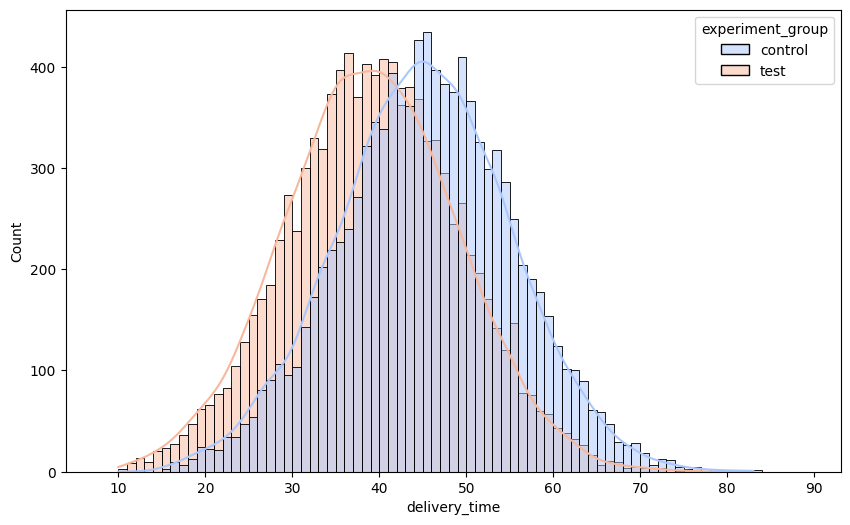

In [120]:
edges = range(8, 90, 1)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='delivery_time', hue = 'experiment_group', kde=True, palette='coolwarm', bins=edges)
plt.show()

In [121]:
abs(len(df_control) - len(df_test))

12

In [122]:
normaltest(df_test['delivery_time'])

NormaltestResult(statistic=np.float64(7.024157092641915), pvalue=np.float64(0.02983483685333173))

In [123]:
df_test_clean = df_test['delivery_time'].dropna() # результат тот же, поскольку выше мы увидели, что nan'ы отс-т
normaltest(df_test_clean)

NormaltestResult(statistic=np.float64(7.024157092641915), pvalue=np.float64(0.02983483685333173))

In [124]:
normaltest(df_control['delivery_time'])

NormaltestResult(statistic=np.float64(0.25349755437872584), pvalue=np.float64(0.8809549607809654))

In [125]:
df_control_clean = df_control['delivery_time'].dropna()
normaltest(df_control_clean)

NormaltestResult(statistic=np.float64(0.25349755437872584), pvalue=np.float64(0.8809549607809654))

In [126]:
df_test_clean.std()

np.float64(9.883308351129061)

In [127]:
df_control_clean.std()

np.float64(9.990016960246372)

In [128]:
import pingouin as pg

In [129]:
pg.normality(test_arr, method='normaltest', alpha=0.05)

,W,pval,normal
0,7.024157,0.029835,False


In [130]:
pg.normality(control_arr, method='normaltest', alpha=0.05)

,W,pval,normal
0,0.253498,0.880955,True


In [131]:
test_arr = np.array(df_test_clean)
control_arr = np.array(df_control_clean)

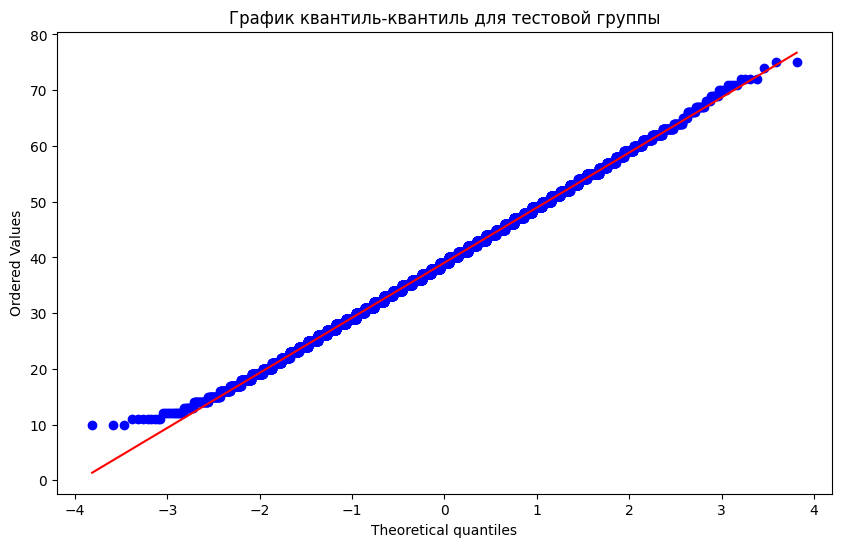

In [132]:
plt.figure(figsize=(10, 6))
stats.probplot(test_arr, dist="norm", plot=plt) 
plt.title('График квантиль-квантиль для тестовой группы')
plt.show()

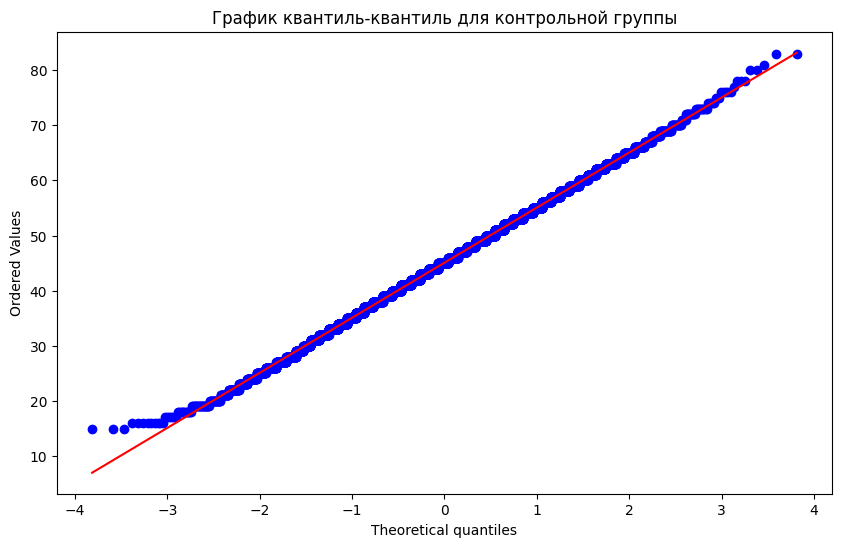

In [133]:
plt.figure(figsize=(10, 6))
stats.probplot(control_arr, dist="norm", plot=plt) 
plt.title('График квантиль-квантиль для контрольной группы')
plt.show()

In [134]:
stats.ttest_ind(test_arr, control_arr)

TtestResult(statistic=np.float64(-43.03582663183714), pvalue=np.float64(0.0), df=np.float64(20194.0))

In [135]:
stats.ttest_ind(control_arr, test_arr)

TtestResult(statistic=np.float64(43.03582663183714), pvalue=np.float64(0.0), df=np.float64(20194.0))

In [136]:
perc_chenge = ((test_arr.mean() - control_arr.mean()) / control_arr.mean()) * 100
round(perc_chenge, 2)

np.float64(-13.35)

---

In [137]:
x = test_arr
y = control_arr
m = len(x)
n = len(y)
s2x = x.var()
s2y = y.var()
T = (x.mean() - y.mean()) / (s2x/m + s2y/n)**0.5
df = round((s2x/m + s2y/n)**2/((s2x/m)**2/(m-1) + (s2y/n)**2/(n-1)))
st = stats.t(df)
p = st.cdf(T)  
print(T, p)

-43.037683092455666 0.0


In [138]:
test_arr.mean()

np.float64(39.04681314330958)

In [139]:
control_arr.mean()

np.float64(45.065101070154576)

---
## **Выводы**

**1. В научном формате.**

В данном исследовании были проанализированы данные А/В теста, а именно был проверен новый алгоритм доставки, позволяющий курьерам совершать свои последние заказы по окончании рабочего дня так, чтобы маршрут доставки совпадал с их маршрутом до дома. Курьеры были разбиты на две равные группы - *контрольную* (курьеры испытывают старую версию приложения без опции "по пути домой") и *тестовую* (курьеры испытывают новый алгоритм с нововведенной опцией). В ходе анализа мы вычислили среднее время доставки в контрольной группе ($\overline{X_1} = 45.07$ минут) и в тестовой группе ($\overline{X_2} = 39.05$ минут). Критерий Стьюдента для независимых выборок выявил статистически значимую разницу между средними показателями времени доставки: $T = 43.04, \,\, p \approx 0.$ $p < 0.05,$ следовательно, на уровне значимости $\alpha = 0.05$ нулевая гипотеза отвергается в пользу альтернативной о том, что разница между средним временем доставки в тестовой и контрольной группах есть. Среднее время доставки в тестовой группе снизилось на $13.35 \%$ по сравнению с контрольной группой. Таким образом, можно сделать вывод о том, что новый алгоритм повышает эффективость доставки в момент пересмены.

**2. В понятном формате (в понятных для бизнеса терминах)**

Для решения проблемы сннижения эффективности доставки в момент окончания рабочего дня курьеров, специалисты придумали новый алгоритм работы приложения, который позволяет курьерам спланировать свои последние заказы так, чтобы маршрут доставки пиццы совпадал с маршрутом до дома курьера. В результате тестирования нового алгоритма было выявлено, что среднее время доставки снизилось на 6 минут по сравнению со старым алгоритмом. Это говорит о том, что нововведение позволяет курьерам совершать заказы быстрее в момент окончания их рабочего дня. Следовательно, эффективость доставки вечером в момент большого количества заказов повышается. Поэтому я могу порекомендовать внедрить новую опцию в приложение для курьеров.